<a href="https://colab.research.google.com/github/Durgesh-Yadav01/Heartdisease-prediction/blob/main/SVMheartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/Train_dataset.csv")

In [ ]:
train.shape

(242, 15)

In [ ]:
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,patient_id
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,179
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,228
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,111
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,246
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,60


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         242 non-null    int64  
 1   sex         242 non-null    int64  
 2   cp          242 non-null    int64  
 3   trtbps      242 non-null    int64  
 4   chol        242 non-null    int64  
 5   fbs         242 non-null    int64  
 6   restecg     242 non-null    int64  
 7   thalachh    242 non-null    int64  
 8   exng        242 non-null    int64  
 9   oldpeak     242 non-null    float64
 10  slp         242 non-null    int64  
 11  caa         242 non-null    int64  
 12  thall       242 non-null    int64  
 13  output      242 non-null    int64  
 14  patient_id  242 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 28.5 KB


In [ ]:
train.isnull().sum()

age           0
sex           0
cp            0
trtbps        0
chol          0
fbs           0
restecg       0
thalachh      0
exng          0
oldpeak       0
slp           0
caa           0
thall         0
output        0
patient_id    0
dtype: int64

In [ ]:
dict = {}
for i in list(train.columns):
    dict[i] = train[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,45
chol,133
fbs,2
restecg,3
thalachh,84
exng,2
oldpeak,38


In [ ]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [ ]:
train[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,242.0,54.330579,9.267252,29.0,47.0,55.5,61.00,77.0
trtbps,242.0,131.785124,17.810066,94.0,120.0,130.0,140.00,200.0
chol,242.0,249.330579,52.110064,126.0,212.0,243.5,281.75,564.0
thalachh,242.0,150.413223,22.548489,71.0,138.0,153.0,166.75,202.0
oldpeak,242.0,1.048760,1.180239,0.0,0.0,0.8,1.60,6.2


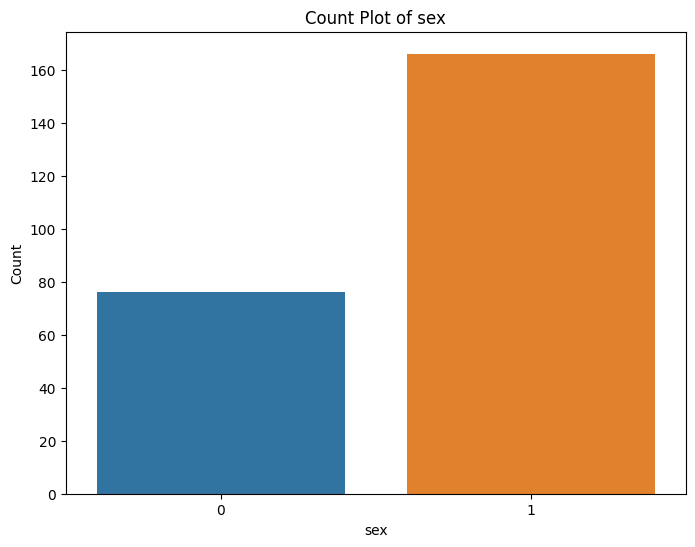

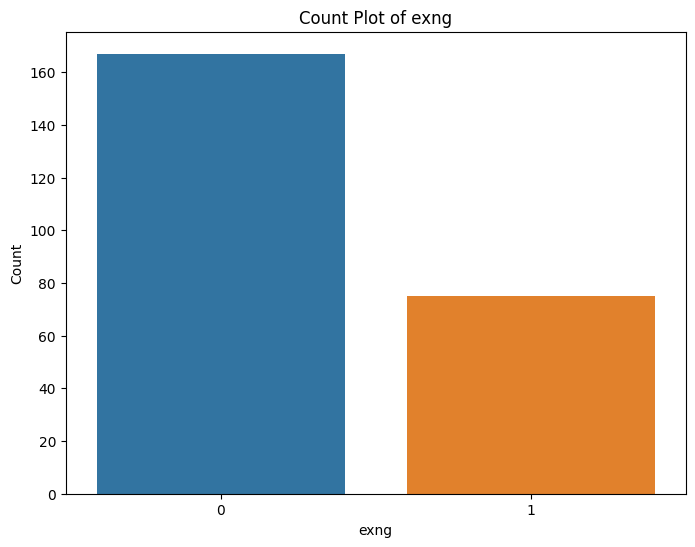

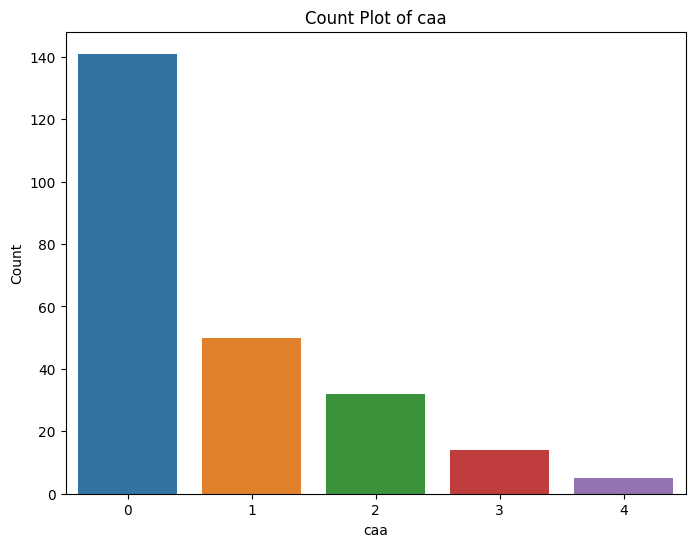

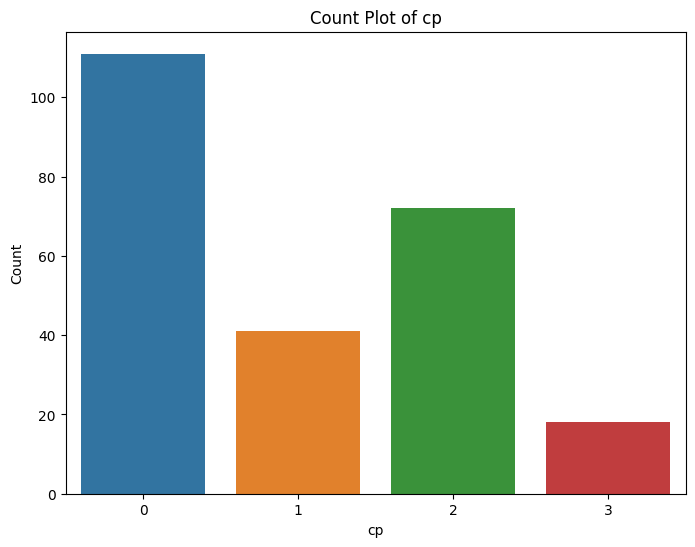

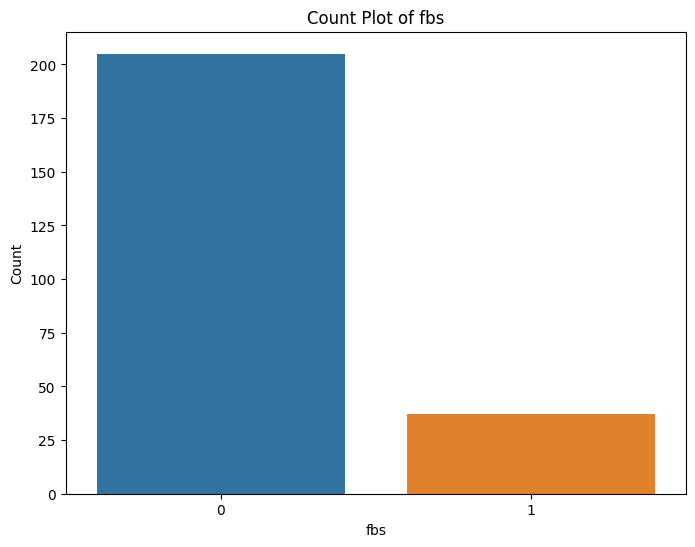

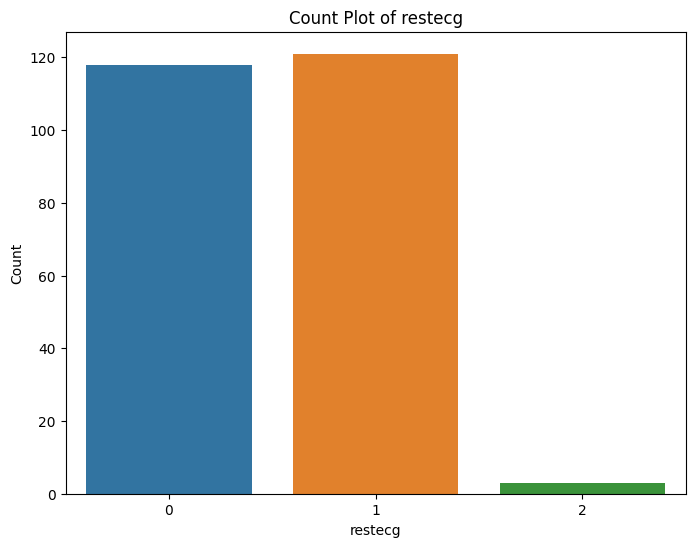

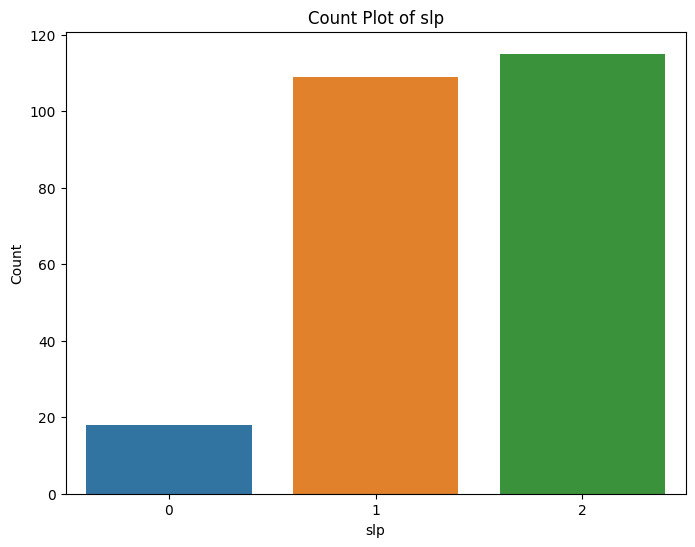

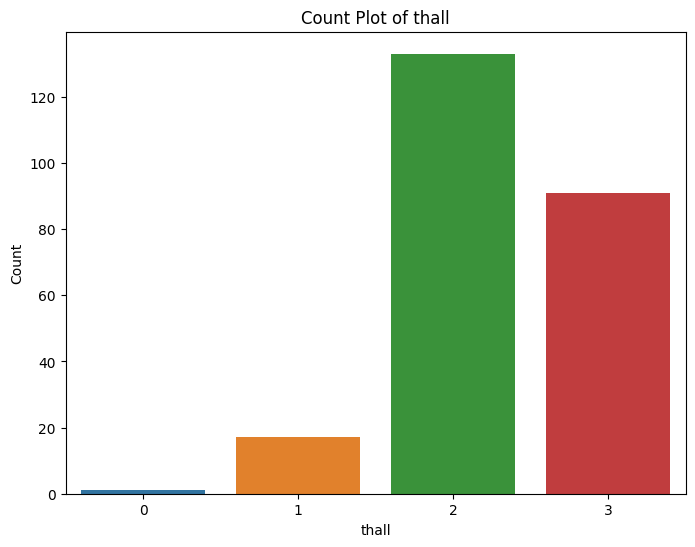

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=train)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

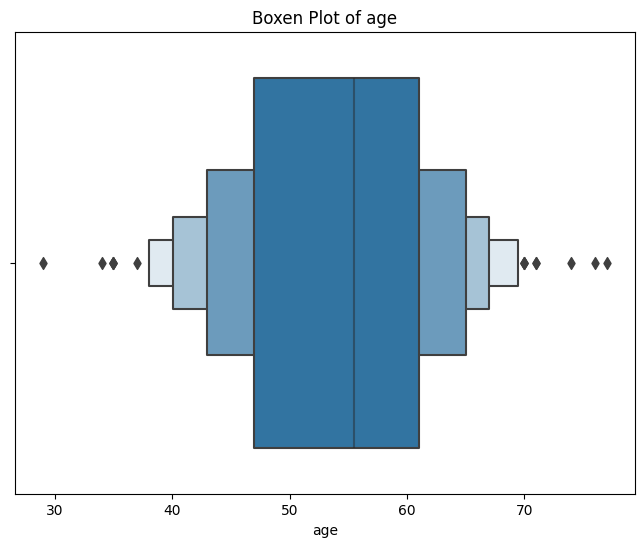

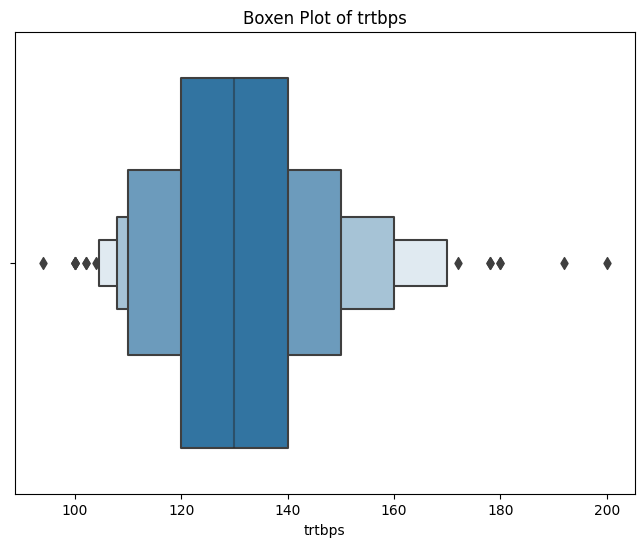

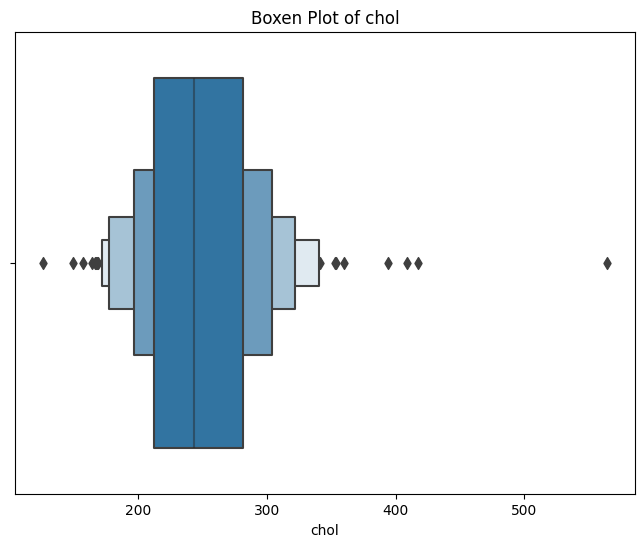

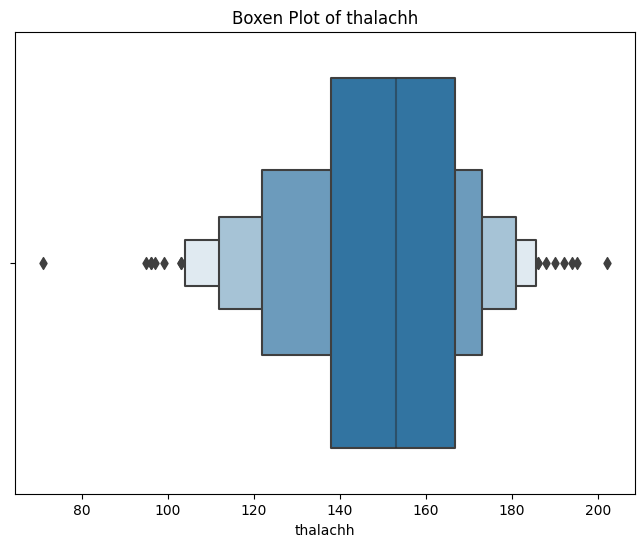

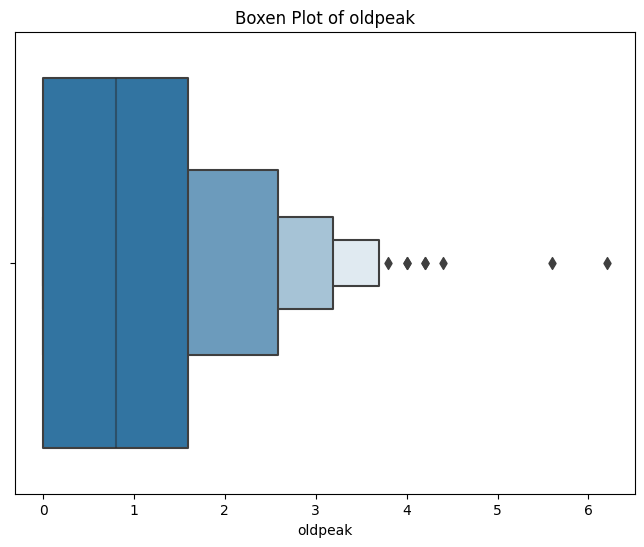

In [ ]:
for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.boxenplot(x=col, data=train)
    plt.title(f'Boxen Plot of {col}')
    plt.xlabel(col)
    plt.show()

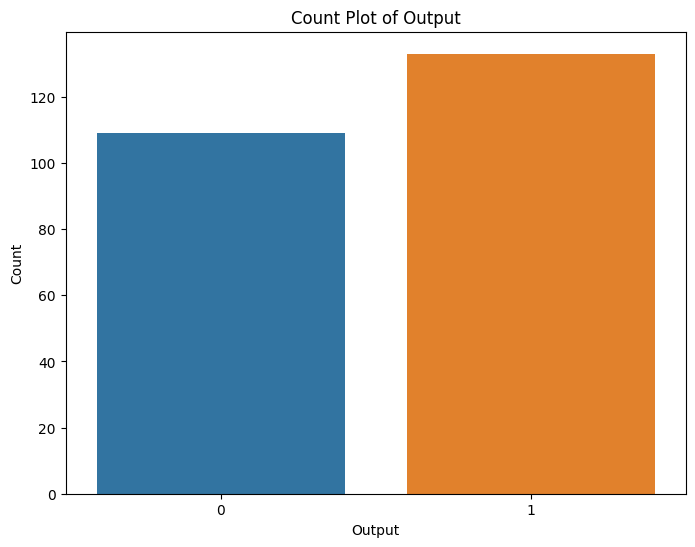

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=train)
plt.title('Count Plot of Output')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

In [ ]:
train_corr = train[continuous_cols].corr().transpose()
train_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.267948,0.231344,-0.418349,0.212295
trtbps,0.267948,1.000000,0.078886,-0.010110,0.206468
chol,0.231344,0.078886,1.000000,-0.037722,-0.010457
thalachh,-0.418349,-0.010110,-0.037722,1.000000,-0.350297
oldpeak,0.212295,0.206468,-0.010457,-0.350297,1.000000


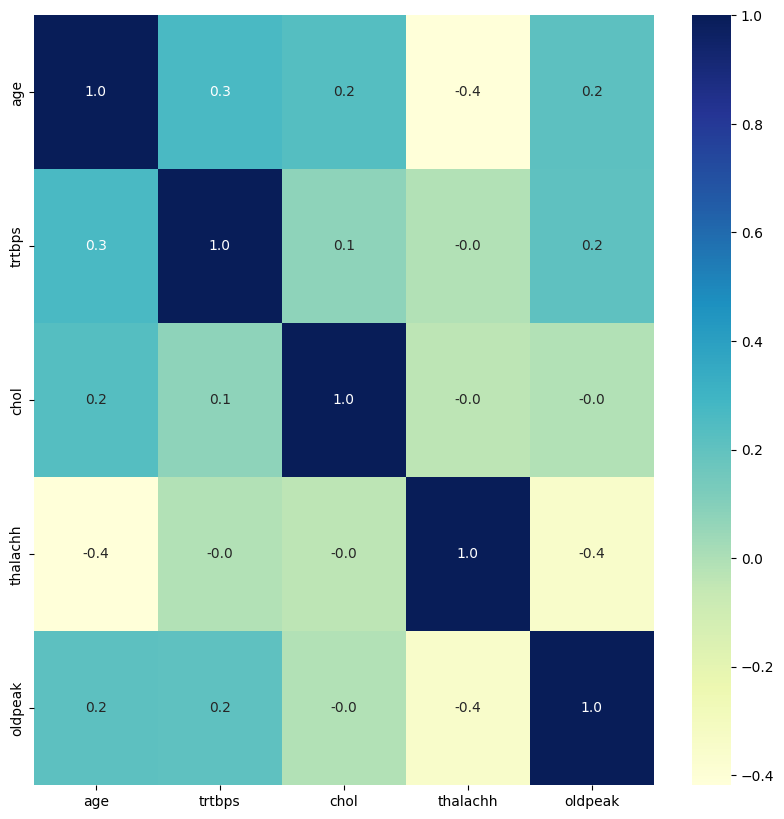

In [ ]:
fig = plt.figure(figsize=(10,10))
train_corr = train[continuous_cols].corr().transpose()
sns.heatmap(train_corr,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()


<Figure size 1200x1200 with 0 Axes>

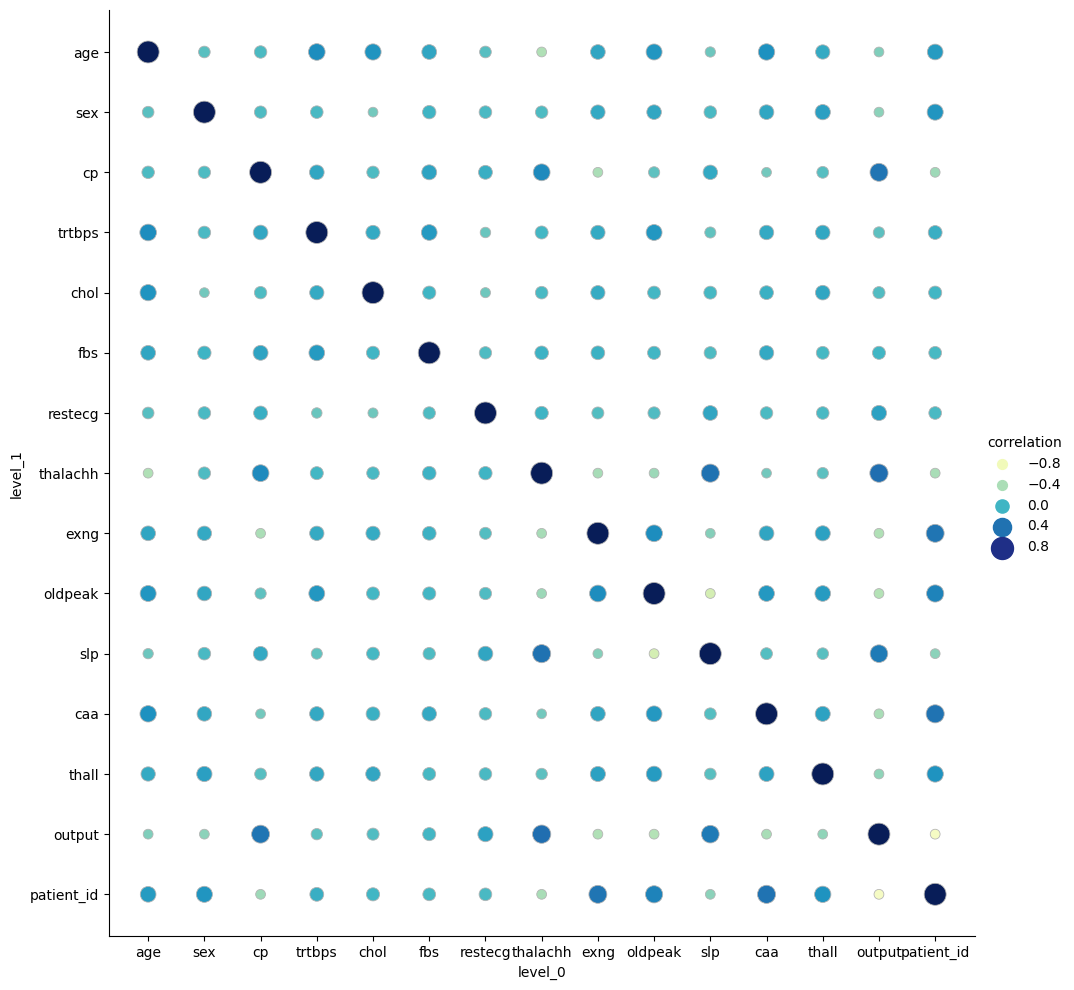

In [ ]:
fig = plt.figure(figsize=(12,12))
corr_mat = train.corr().stack().reset_index(name="correlation")
sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
plt.show()

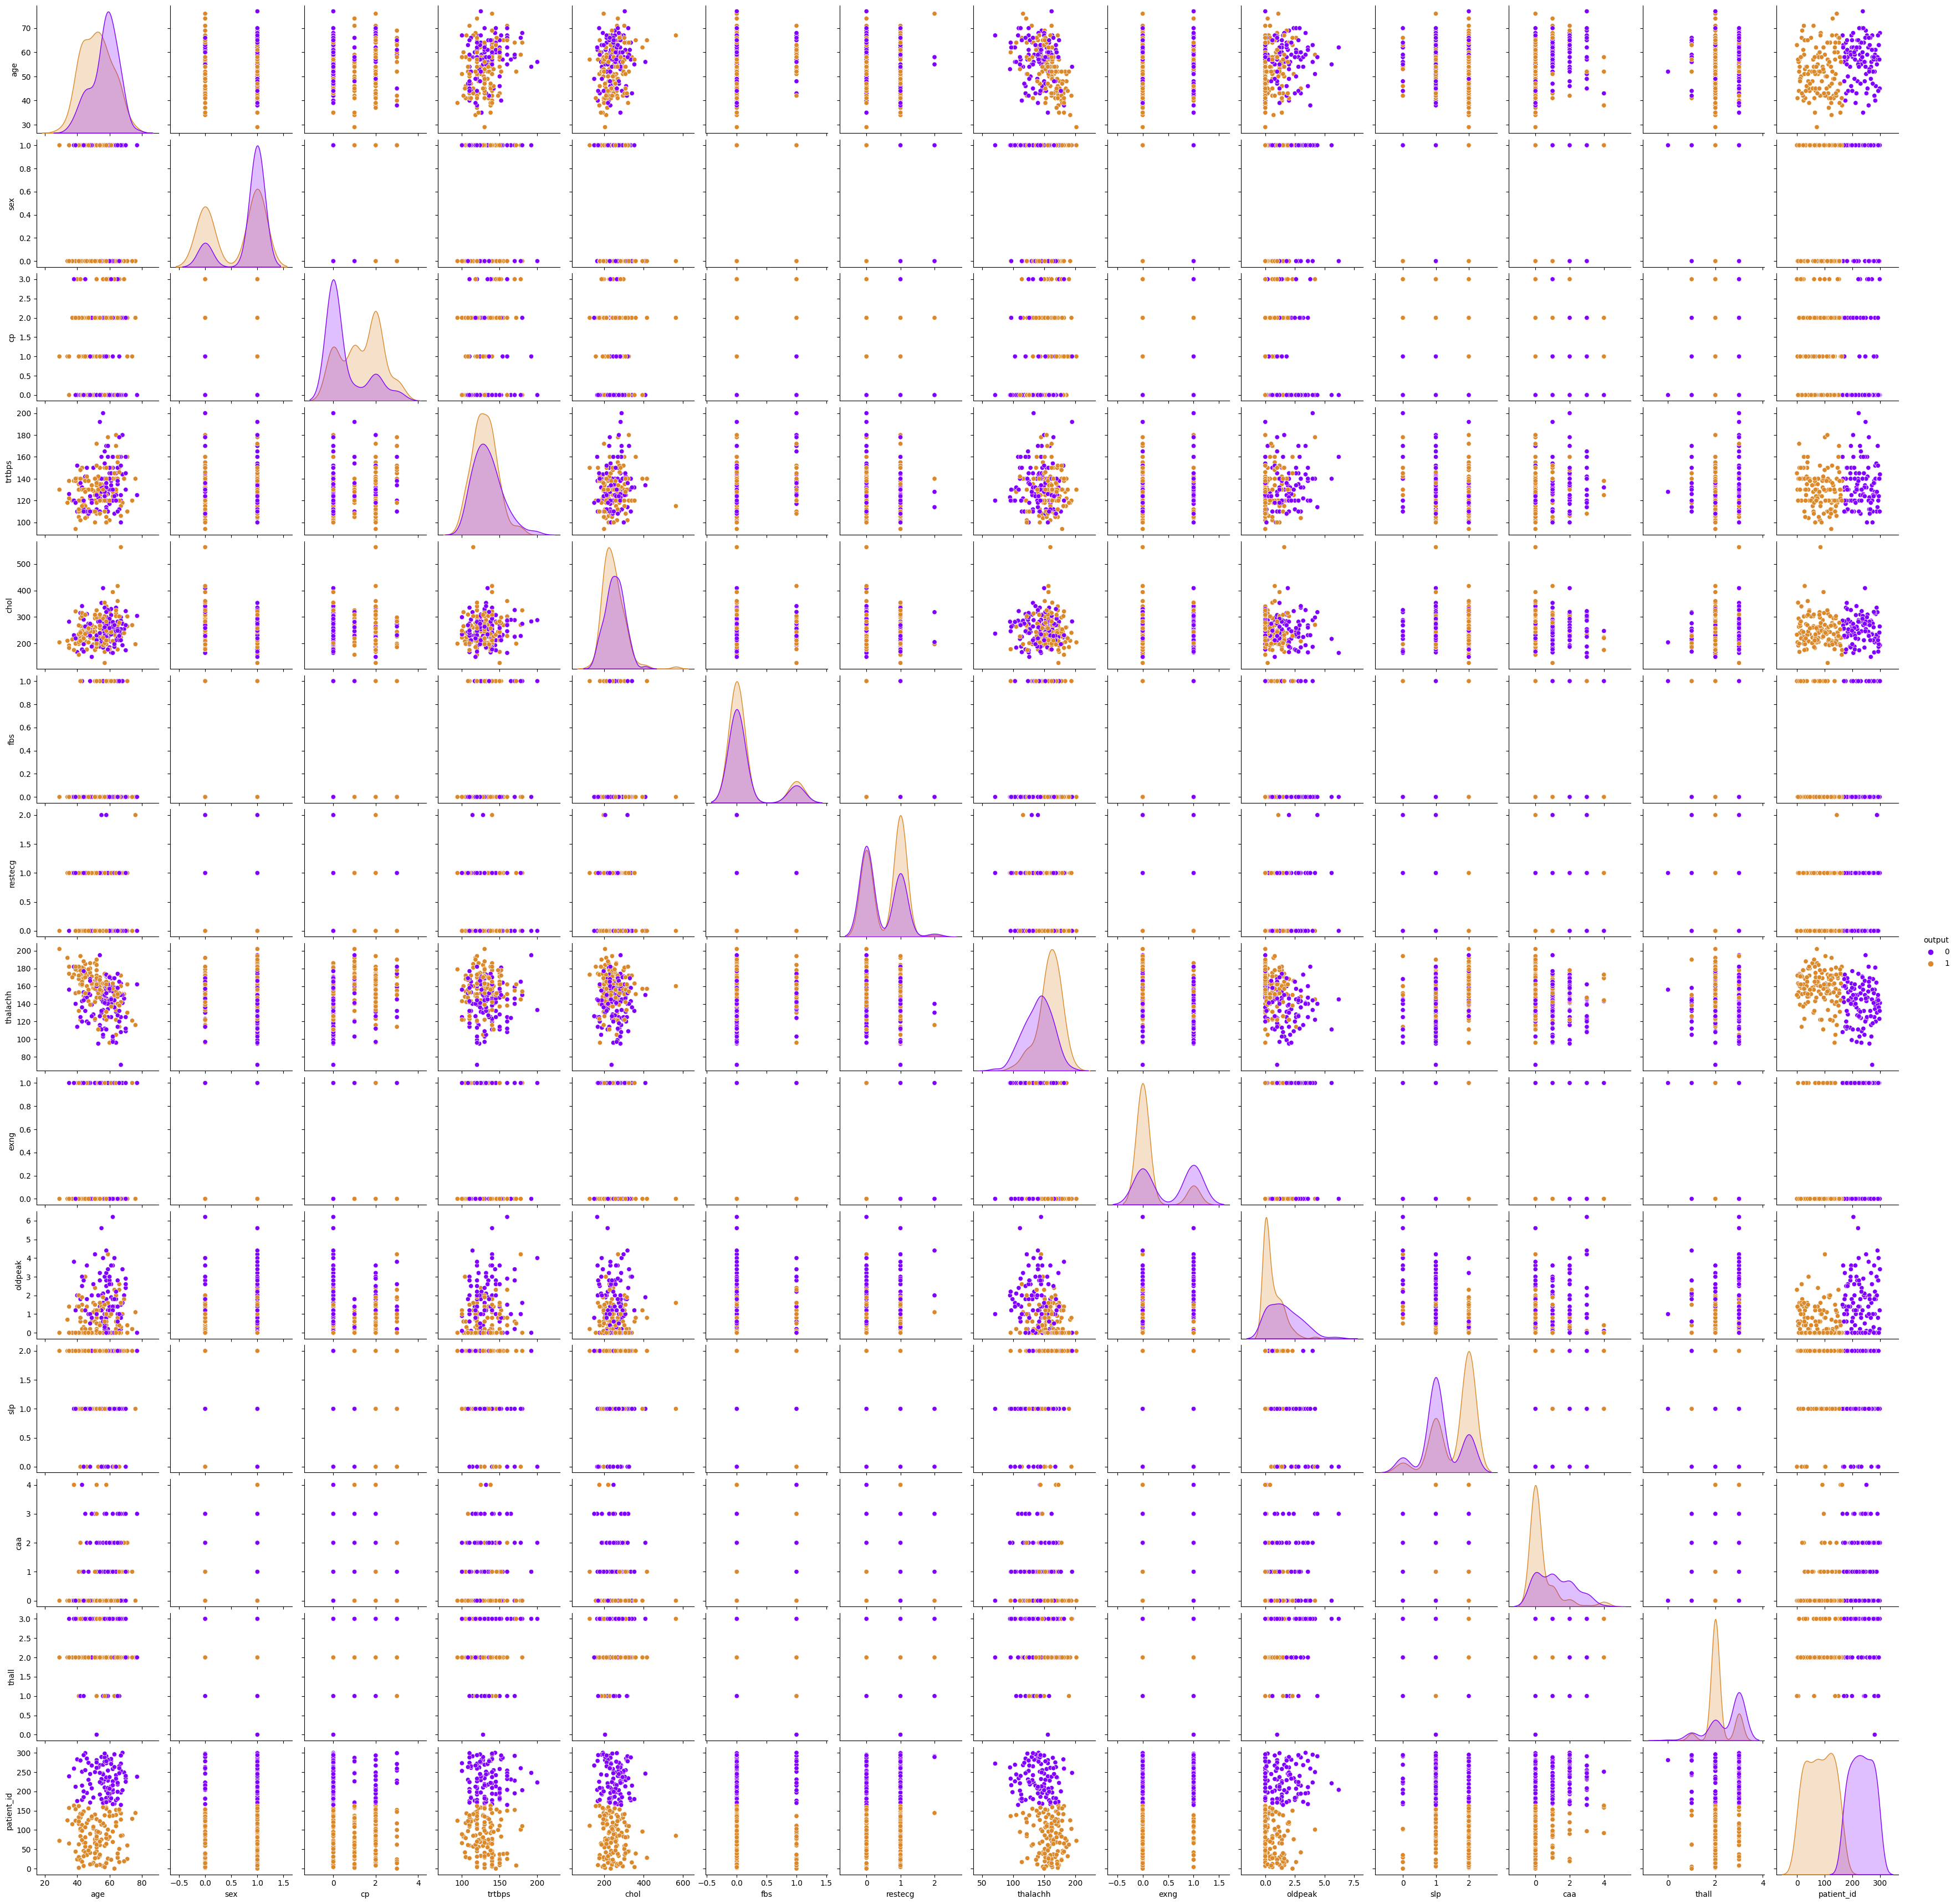

In [ ]:
sns.pairplot(train,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,patient_id
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,179
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,228
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,111
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,246
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,60


In [ ]:
train1 = train

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

train1 = pd.get_dummies(train1, columns = cat_cols, drop_first = True)

In [ ]:
train1.head()

,age,trtbps,chol,thalachh,oldpeak,output,patient_id,sex_1,exng_1,caa_1,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,57,150,276,112,0.6,0,179,1,1,1,...,0,0,0,0,0,1,0,1,0,0
1,59,170,288,159,0.2,0,228,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,57,150,126,173,0.2,1,111,1,0,1,...,1,0,1,1,0,0,1,0,0,1
3,56,134,409,150,1.9,0,246,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,71,110,265,130,0.0,1,60,0,0,1,...,1,0,1,0,0,0,1,0,1,0


In [ ]:
train1=train1.drop(['caa_4'],axis=1)

In [ ]:


# defining the features and target
X = train1.drop(['output'],axis=1)
y = train1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,patient_id,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.107143,1.0,0.465950,-1.426087,-0.1250,179,1,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.250000,2.0,0.637993,0.208696,-0.3750,228,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0.107143,1.0,-1.684588,0.695652,-0.3750,111,1,0,1,0,...,1,0,1,1,0,0,1,0,0,1
3,0.035714,0.2,2.372760,-0.104348,0.6875,246,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1.107143,-1.0,0.308244,-0.800000,-0.5000,60,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0


**SVM** **MODEL**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*testing* *svm* *model* on testdataset

In [ ]:
testsvm=pd.read_csv('/content/test_dataset1.csv')
testsvm.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,patient_id
0,45,0,1,112,160,0,1,138,0,0.0,1,0,2,94
1,55,0,0,180,327,0,2,117,1,3.4,1,0,2,266
2,35,1,0,120,198,0,1,130,1,1.6,1,0,3,227
3,59,1,3,134,204,0,1,162,0,0.8,2,2,2,286
4,60,1,0,125,258,0,0,141,1,2.8,1,1,3,201


In [ ]:
patient_id1=testsvm['patient_id']

In [ ]:
testsvm1 = testsvm

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

testsvm1 = pd.get_dummies(testsvm1, columns = cat_cols, drop_first = True)

In [ ]:
testsvm1.head()

,age,trtbps,chol,thalachh,oldpeak,patient_id,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,45,112,160,138,0.0,94,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,55,180,327,117,3.4,266,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,35,120,198,130,1.6,227,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
3,59,134,204,162,0.8,286,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
4,60,125,258,141,2.8,201,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
num_rows1 = testsvm1.shape[0]
num_rows1

61

In [ ]:
y_pred1 = clf.predict(testsvm1)

In [ ]:
import csv

# Define the data for the two columns
 # Replace with your values for column 2

# Define the file path and name for the CSV file
csv_file = "/content/submision_svm.csv"  # Replace with your desired file name and path

# Create and write the data to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['patient_id', 'output '])  # Write the header row
    writer.writerows(zip(patient_id1, y_pred1))  # Write the data rows

print("CSV file created successfully.")

CSV file created successfully.


**GRADIENT** **BOSSTINF** **CLASSIFIER** **MODEL**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

gbt.fit(X_train,y_train)

y_pred2 = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test accuracy score of Gradient Boosting Classifier is  1.0


testing gbt model on testdataset

In [ ]:
test=pd.read_csv('/content/test_dataset.csv')
test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,patient_id
0,45,0,1,112,160,0,1,138,0,0.0,1,0,2,94
1,55,0,0,180,327,0,2,117,1,3.4,1,0,2,266
2,35,1,0,120,198,0,1,130,1,1.6,1,0,3,227
3,59,1,3,134,204,0,1,162,0,0.8,2,2,2,286
4,60,1,0,125,258,0,0,141,1,2.8,1,1,3,201


In [ ]:
patient_id=test['patient_id']

In [ ]:
test1 = test

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

test1 = pd.get_dummies(test1, columns = cat_cols, drop_first = True)

In [ ]:
test1.head()

,age,trtbps,chol,thalachh,oldpeak,patient_id,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,45,112,160,138,0.0,94,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,55,180,327,117,3.4,266,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,35,120,198,130,1.6,227,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
3,59,134,204,162,0.8,286,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
4,60,125,258,141,2.8,201,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
num_rows = test1.shape[0]
num_rows

61

In [ ]:
y_pred3 = gbt.predict(test1)

In [ ]:
import csv

# Define the data for the two columns
 # Replace with your values for column 2

# Define the file path and name for the CSV file
csv_file = "/content/submision_gbt.csv"  # Replace with your desired file name and path

# Create and write the data to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['patient_id', 'output '])  # Write the header row
    writer.writerows(zip(patient_id, y_pred3))  # Write the data rows

print("CSV file created successfully.")

CSV file created successfully.
